## Argo Salinity Practice

The goal for this notebook is to start examining Argo data by looking at floats that have interesting profiles/sections. For a list of ACTION ITEMS that will hopefully be included, see: https://github.com/ocean-transport/argo-intern/issues/1#issuecomment-1150208594

THIS NOTEBOOK CONTAINS SALINITY DATA. SEE CORRESPONDING NOTEBOOK WITH TEMPERATURE DATA.

In [269]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean

In [325]:
#list of floats IDs I find interesting, #5905051 #1902024
float_sel = [6901199, 3901602, 5905033, 5904640, 1901863, 5903555]
float_sel.sort()

(<Figure size 900x540 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

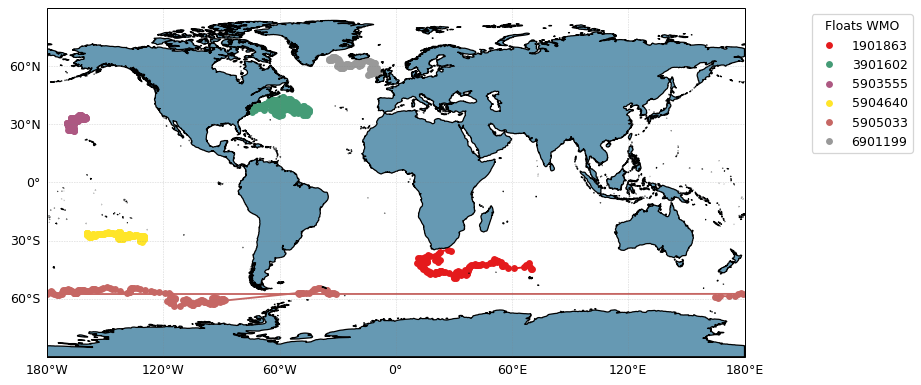

In [326]:
#plot the paths of each float on a global map

idx = ArgoDataFetcher().float(float_sel).load()
idx.plot('trajectory', set_global=True)

Text(0.5, 1.0, 'Float number 6901199, SALINITY')

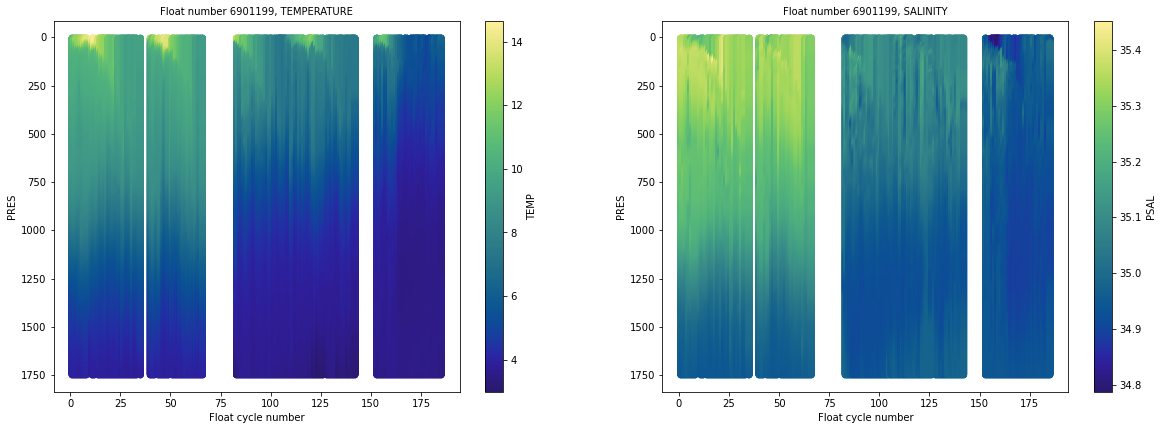

In [330]:
#TEMPATURE AND SALINITY
#Pressure levels defined using the INTERPOLATION method
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

levels = list(range(0, 1750))

#this defines afloat_prof for the bin method in the cell below as well
afloat = argo_loader.float(float_sel[5]).to_xarray()
afloat_prof = afloat.argo.point2profile()
afloat_interp = afloat_prof.argo.interp_std_levels(levels)

fig,axes = plt.subplots(figsize=(20,15))

#temperature left
plt.subplot(2,2,1)
afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='TEMP', cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()
plt.title("Float number {}, TEMPERATURE".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=10)

#salinity right
plt.subplot(2,2,2)
afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()
plt.title("Float number {}, SALINITY".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=10)

Text(0.5, 1.0, 'Float number 6901199, SALINITY')

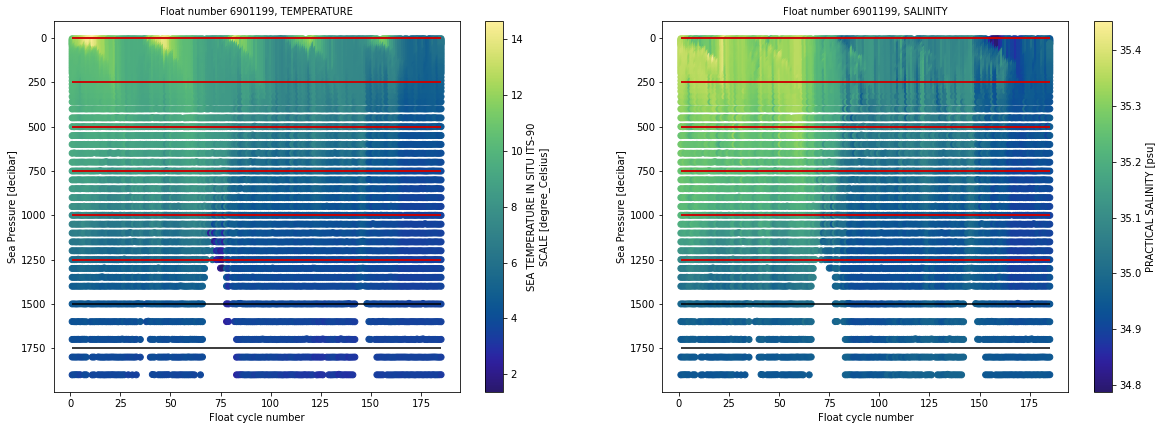

In [331]:
#TEMPERATURE AND SALINITY
#Pressure levels defined using the BIN method
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

#I'm not entirely sure how this works because I can comment out bins, afloat_binned,
#and all the lines that start with plt and it looks the sam just without red annotations...

bins = np.arange(0.0, np.max(afloat_prof['PRES']), 250.0)
afloat_binned = afloat_prof.argo.groupby_pressure_bins(bins=bins, select='mean')

fig,axes = plt.subplots(figsize=(20,15))

#temperature, left
plt.subplot(2,2,1)
afloat.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='TEMP', cmap=cmocean.cm.haline)
#plt.plot(afloat_binned['CYCLE_NUMBER'], afloat_binned['PRES'], 'r+')
plt.hlines(bins, afloat['CYCLE_NUMBER'].min(), afloat['CYCLE_NUMBER'].max(), color='k')
plt.hlines(afloat_binned['STD_PRES_BINS'], afloat_binned['CYCLE_NUMBER'].min(), afloat_binned['CYCLE_NUMBER'].max(), color='r')
plt.gca().invert_yaxis()
plt.title("Float number {}, TEMPERATURE".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=10)

#salinity, right
plt.subplot(2,2,2)
afloat.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', cmap=cmocean.cm.haline)
#plt.plot(afloat_binned['CYCLE_NUMBER'], afloat_binned['PRES'], 'r+')
plt.hlines(bins, afloat['CYCLE_NUMBER'].min(), afloat['CYCLE_NUMBER'].max(), color='k')
plt.hlines(afloat_binned['STD_PRES_BINS'], afloat_binned['CYCLE_NUMBER'].min(), afloat_binned['CYCLE_NUMBER'].max(), color='r')
plt.gca().invert_yaxis()
plt.title("Float number {}, SALINITY".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=10)

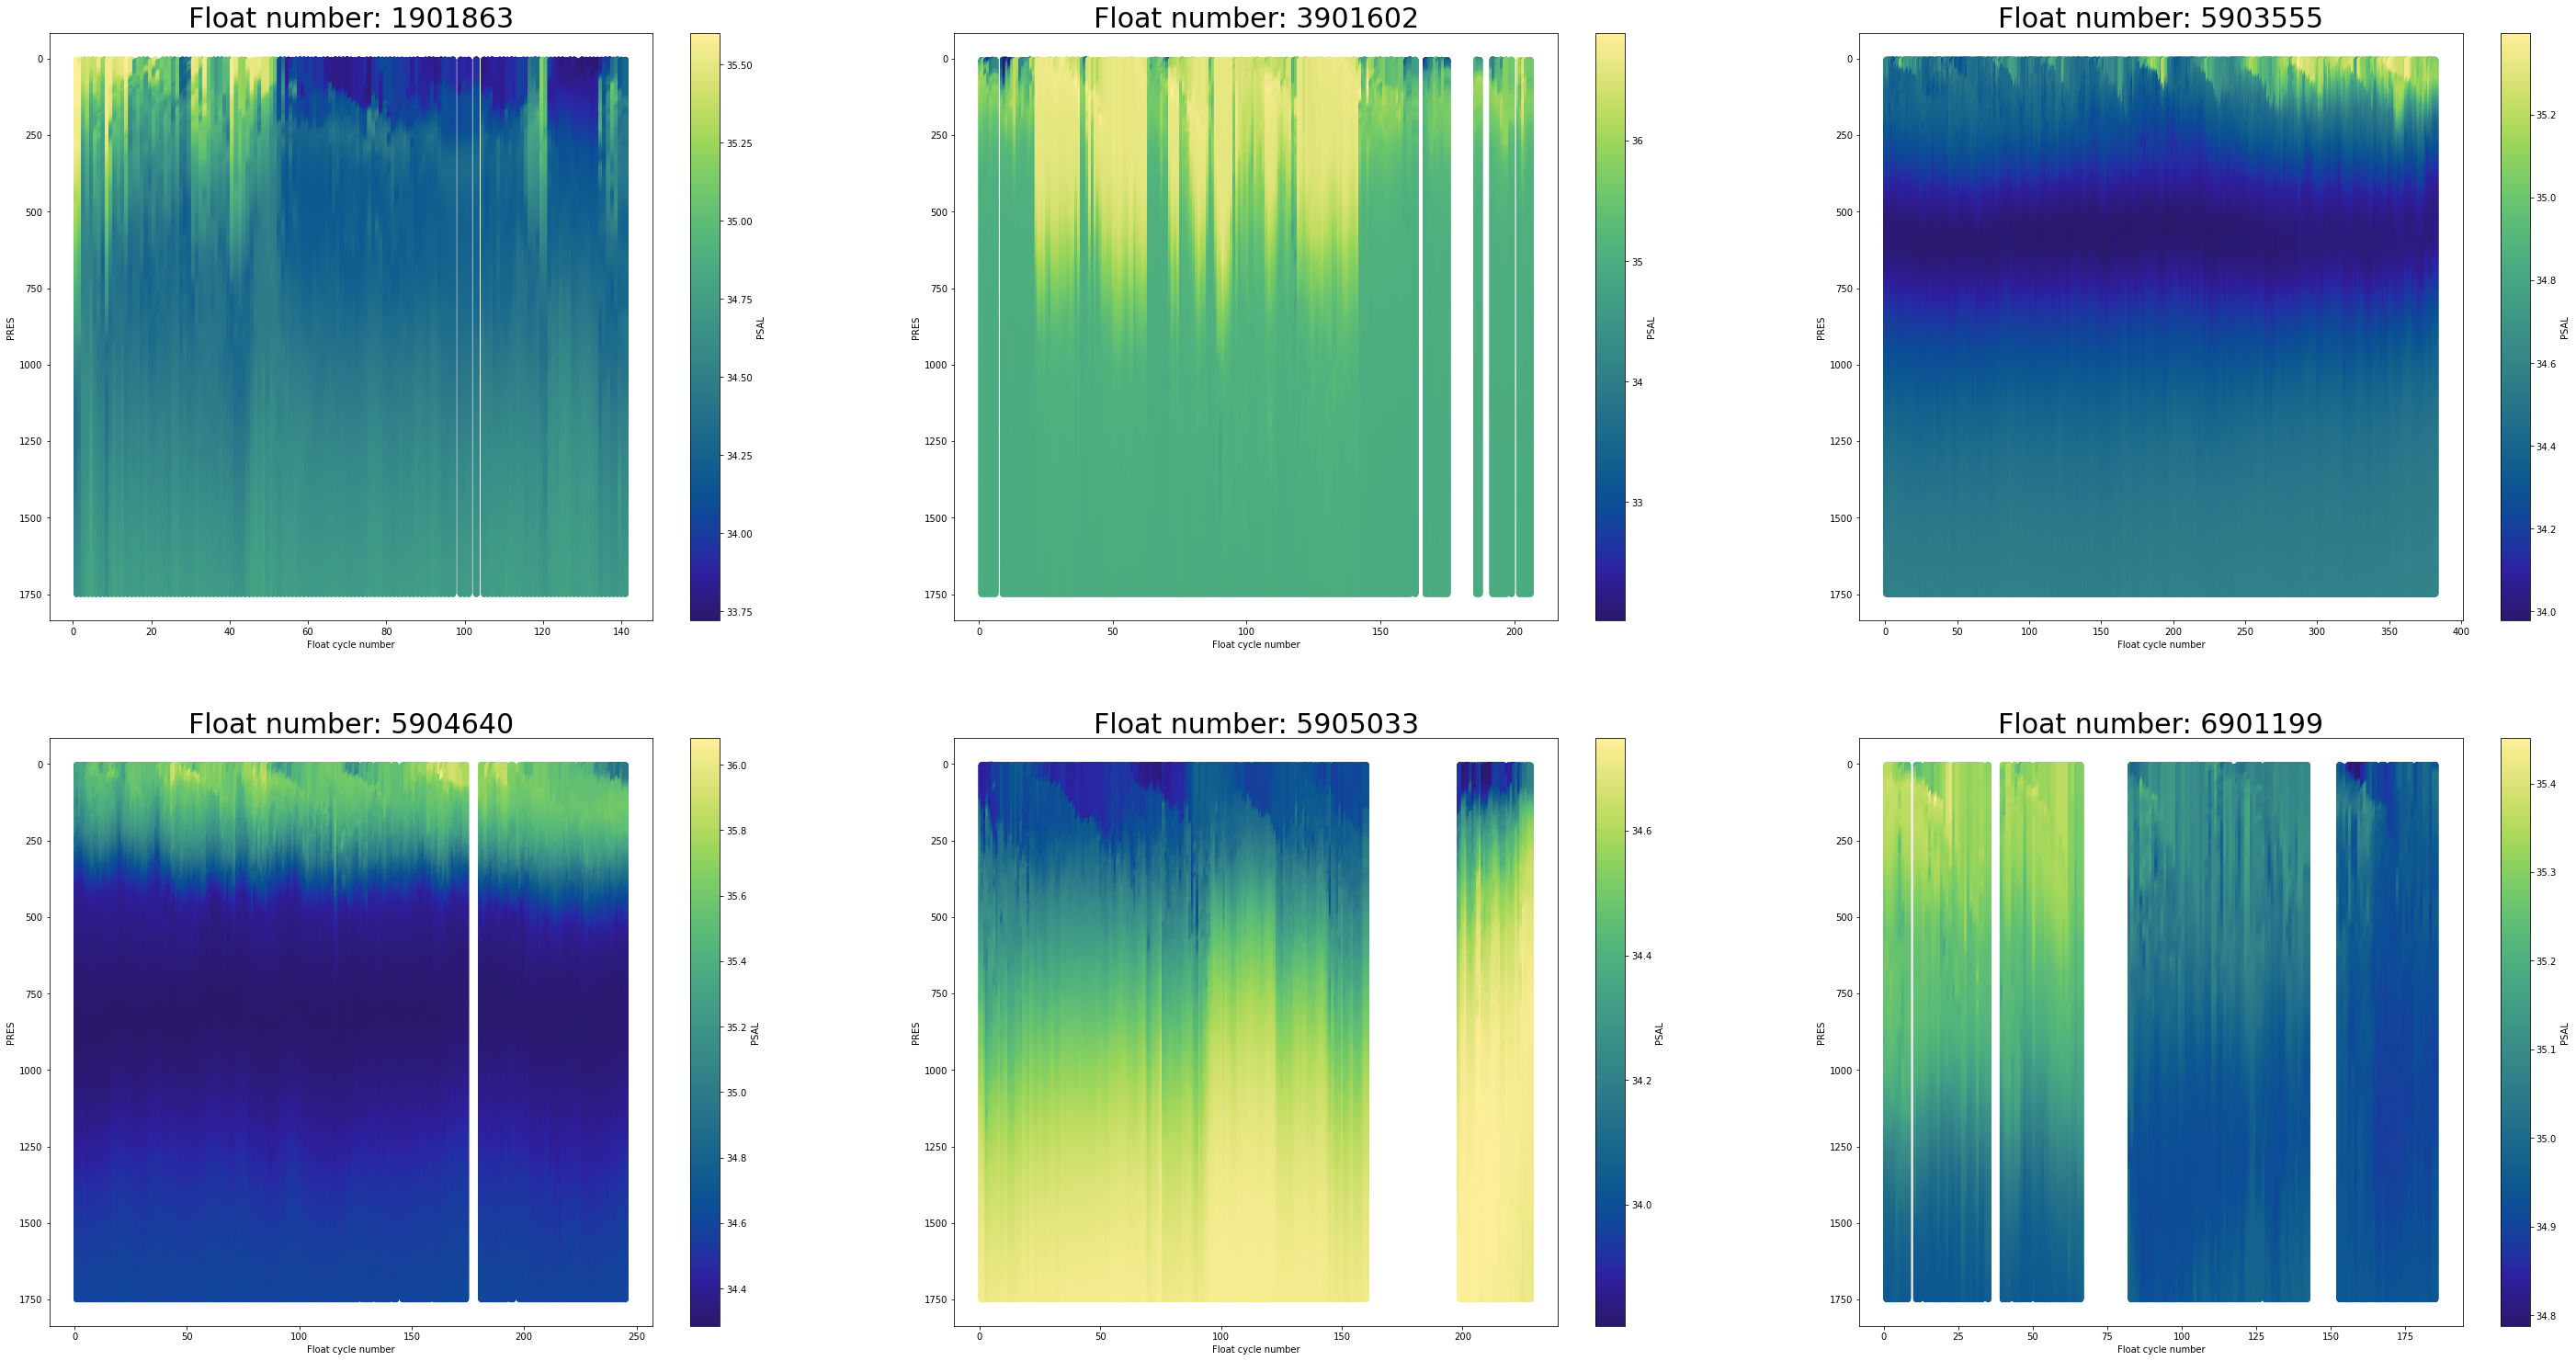

In [328]:
#SALINITY
#Pressure levels defined using the INTERPOLATION method
#https://argopy.readthedocs.io/en/latest/data_manipulation.html


fig,ax = plt.subplots(figsize=(50,40))

for n in range(0,6):
    afloat = argo_loader.float(float_sel[n]).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    
    #levels = list(range(0, int(np.max(afloat.PRES))))
    levels = list(range(0, 1750))
    afloat_interp = afloat_prof.argo.interp_std_levels(levels)

    plt.subplot(3,3,int(n+1))
    afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', cmap=cmocean.cm.haline)
    plt.gca().invert_yaxis()
    plt.title("Float number: {}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=30)


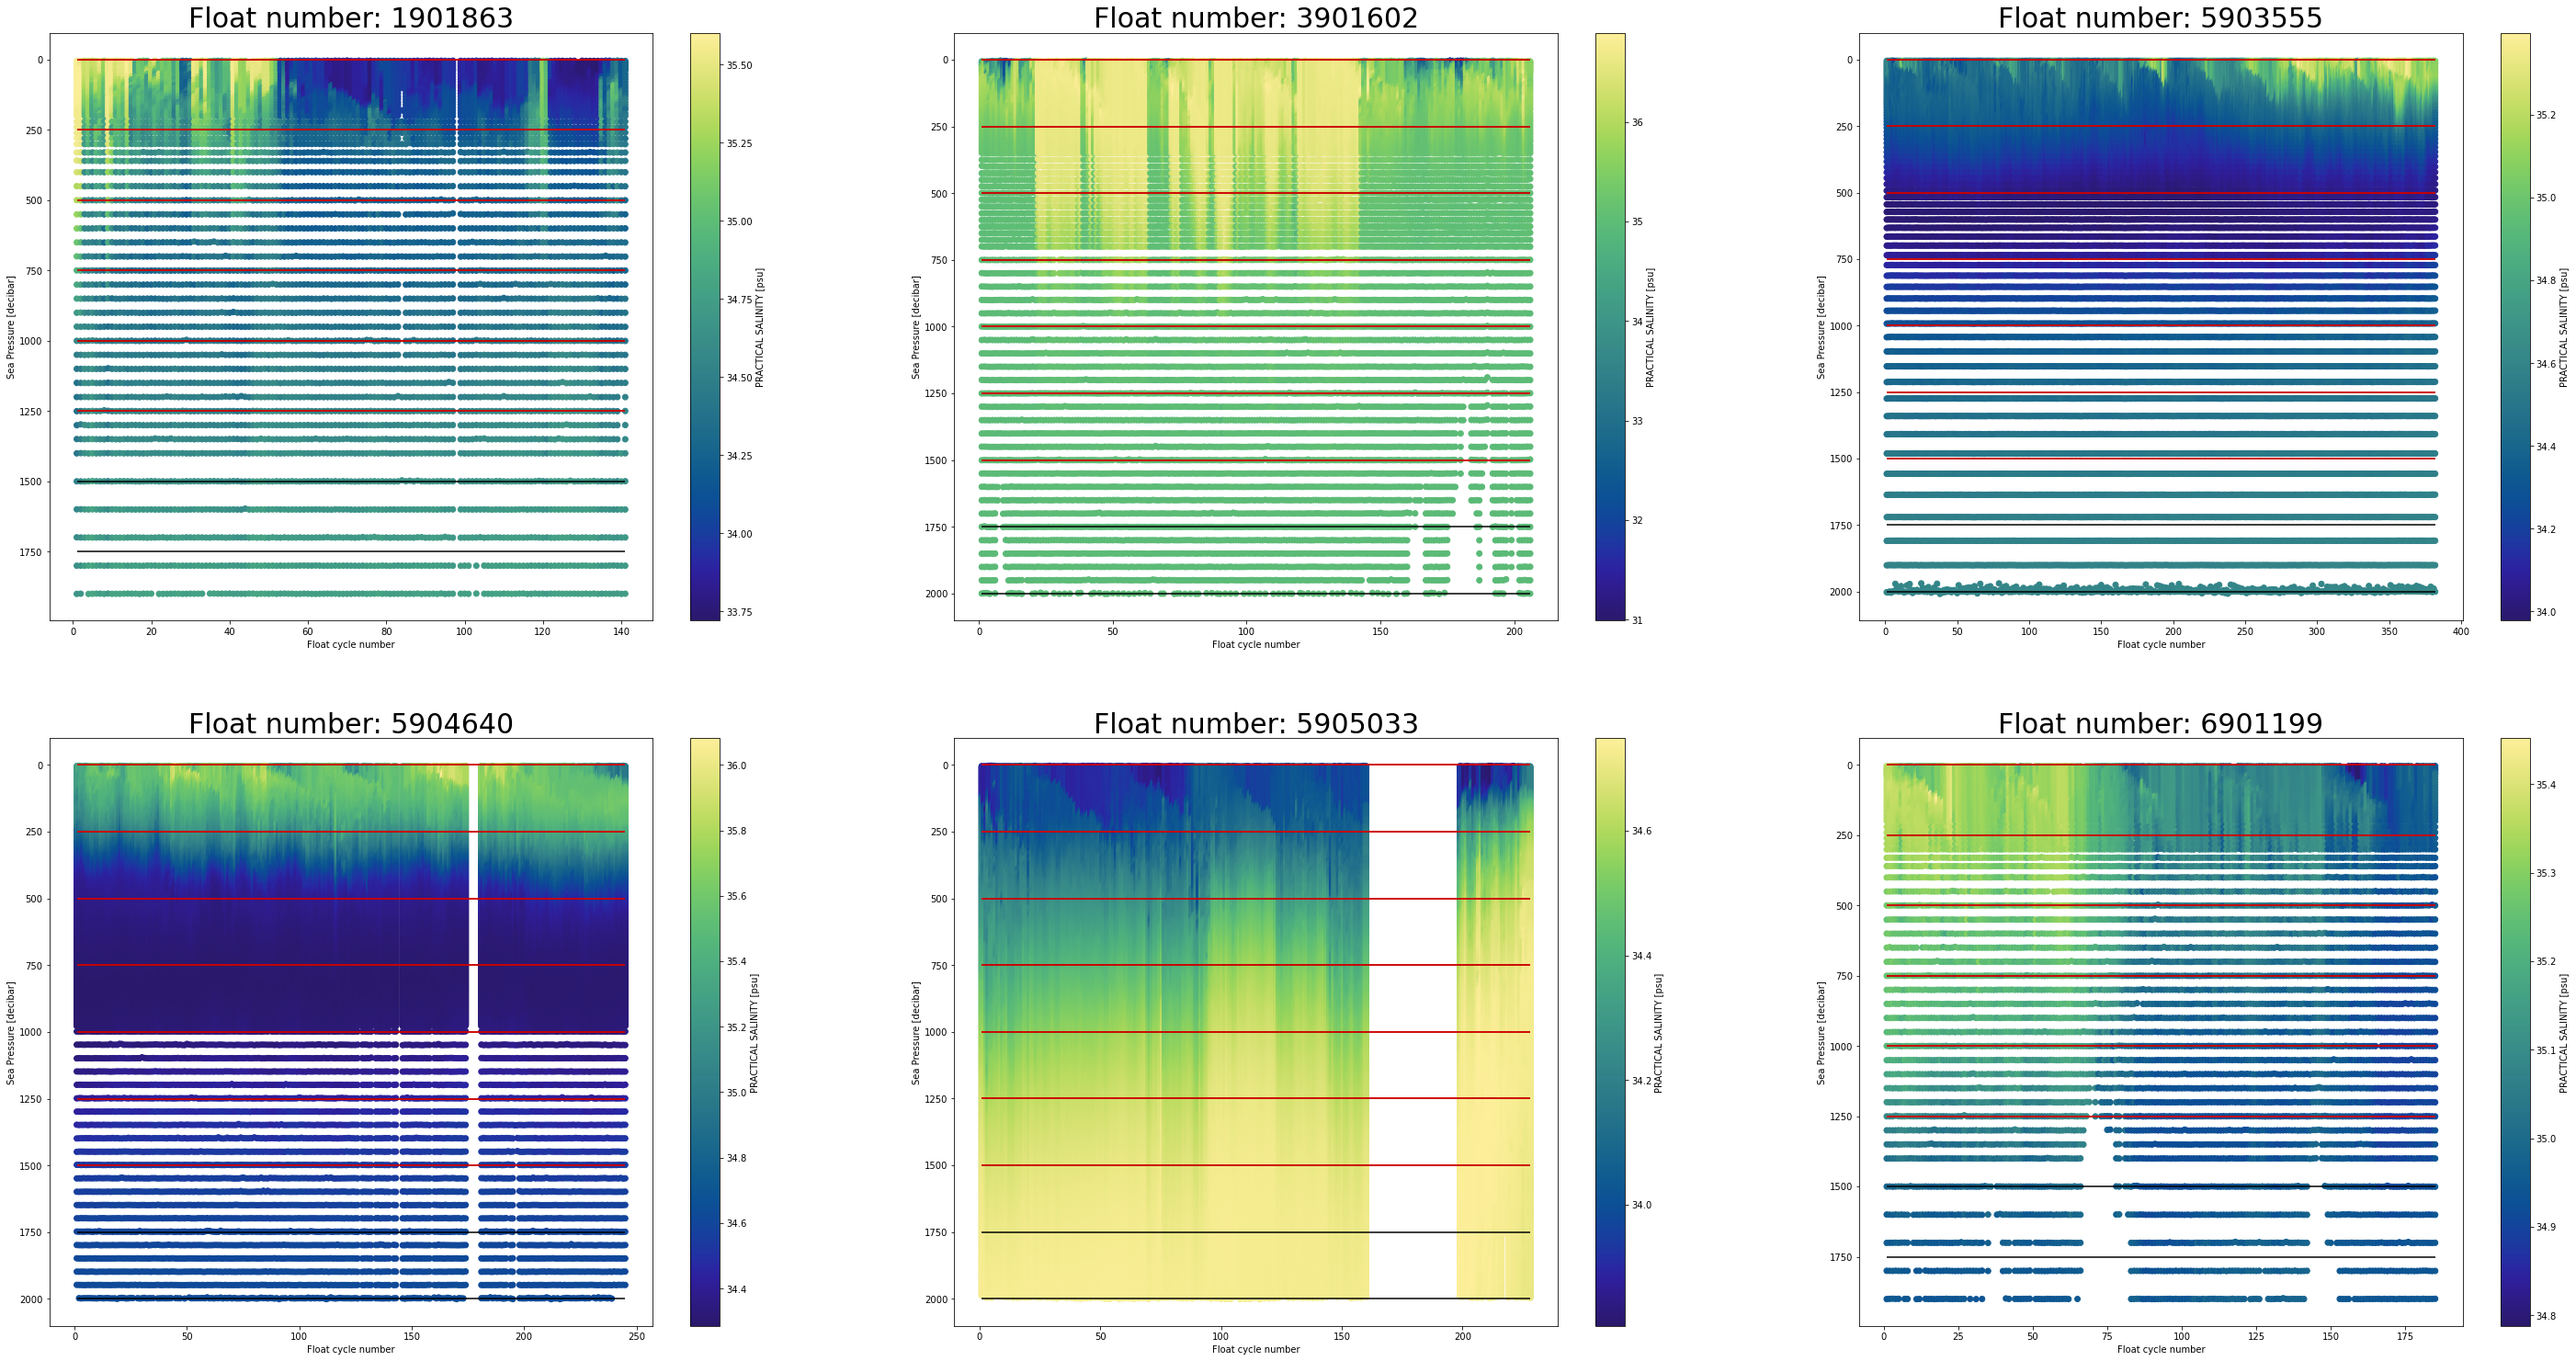

In [329]:
#SALINITY
#Pressure levels defined using the BIN method
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

fig,ax = plt.subplots(figsize=(50,40))

for n in range(0,6):
    afloat = argo_loader.float(float_sel[n]).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    
    bins = np.arange(0.0, np.max(afloat_prof['PRES']), 250.0)
    afloat_binned = afloat_prof.argo.groupby_pressure_bins(bins=bins, select='mean')

    plt.subplot(3,3,int(n+1))
    afloat.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', cmap=cmocean.cm.haline)
    #plt.plot(afloat_binned['CYCLE_NUMBER'], afloat_binned['PRES'], 'r+')
    plt.hlines(bins, afloat['CYCLE_NUMBER'].min(), afloat['CYCLE_NUMBER'].max(), color='k')
    plt.hlines(afloat_binned['STD_PRES_BINS'], afloat_binned['CYCLE_NUMBER'].min(), afloat_binned['CYCLE_NUMBER'].max(), color='r')
    plt.gca().invert_yaxis()
    plt.title("Float number: {}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=30)